# Финальный проект: Анализ оттока клиентов

# Доменная область: "Банки"

## Введение

В банке наблюдается сильный отток клиентов, который угрожает существованию банка. Отдел маркетинга запросил провести исследование, в котором необходимо выделить сегменты отточных клиентов с максимальным покрытием проблемных зон банка, чтобы впоследствии маркетинговое воздействие вызвало бы ументьшение оттока клиентов. Приступим к работе

## Подготовка данных


### Импортируем необходимый набор библиотек для последующей работы над проектом

In [1]:
#библитеки необходимые для загрузки данных с гугл диска:
from io import BytesIO #Эта библиотека необходима вместе с 'requests' для доступа к файлу с данными из гугл диска
import requests

#библиотеки для работы с данными:
import pandas as pd
import numpy as np
import warnings #чтобы не всплывали ненужные предупреждения

#библиотеки для статистического анализа данных:
from scipy import stats as st 
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

#библиотеки для визуализации данных:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Моделирование
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import tree
from sklearn.metrics import accuracy_score

# Визуализация дерева
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

### Откроем файл с данными

In [2]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
data = pd.read_csv(path)
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

Открыли файл с данными, сразу видна необходимость переименования столбцов, а также изменения типов данных. Сделаем это в следующем пункте
    
    
</div>

<p></p>

## Предобработка данных

### Приведем названия колонок к питоновскому стилю

In [4]:
data.columns = map(str.lower, data.columns)
data.rename(columns = {'userid' : 'user_id'}, inplace=True)
data.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Приведем данные в колонках к нужному типу

In [5]:
data.score.astype(int)

0       850
1       861
2       892
3       866
4       730
       ... 
9995    814
9996    894
9997    903
9998    777
9999    828
Name: score, Length: 10000, dtype: int64

### Посчитаем количество пропусков в датасетах

In [6]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [7]:
print("%s%% — процент пропусков в колонке balance"%(data.balance.isna().sum() / len(data) * 100))

22.95% — процент пропусков в колонке balance


In [8]:
print("%s%% — процент пропусков в колонке age"%round(data.age.isna().sum() / len(data) * 100, 2))

0.26% — процент пропусков в колонке age


### Исследуем природу появления пропусков

In [9]:
test = data.copy()

In [10]:
# создадим фиктивную переменную:
test['balance_1'] = test.balance
test.balance_1 = test.balance_1.fillna(-1)
test.loc[(test['balance_1'] != -1), 'balance_1'] = 1
test.loc[(test['balance_1'] == -1), 'balance_1'] = 0
test = test.drop('balance', axis=1)

test.balance_1.value_counts()

1.0    7705
0.0    2295
Name: balance_1, dtype: int64

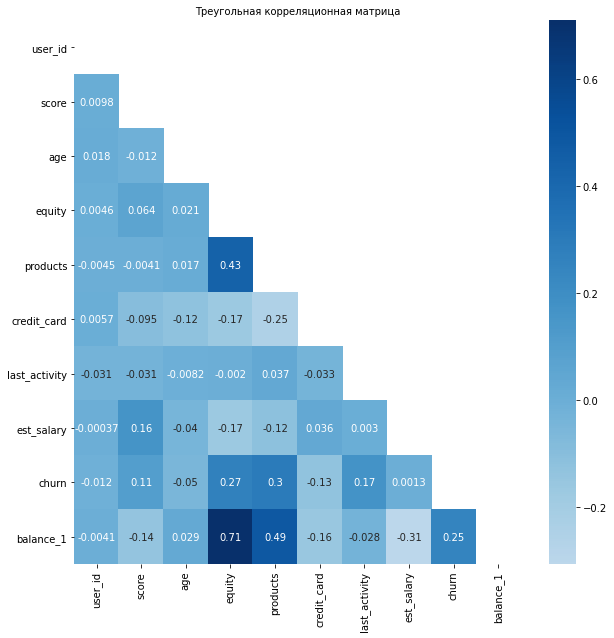

In [11]:
# вычислим корреляцию переменных в датасете с фиктивной:
matrix = test.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
             cmap='Blues')
plt.title('Треугольная корреляционная матрица', fontsize = 10)
plt.show()

Между фиктивной переменной и переменной equity присутствует корреляция. Проверим ее значимость:

${H}_{0}$: Корреляция между фиктивной переменной баланс и оценкой собственности клиента равна нулю

${H}_{1}$: Корреляция между фиктивной переменной баланс и оценкой собственности клиента неравна нулю

$\alpha = 0.05$

In [12]:
results = pearsonr(test.balance_1, test.equity)
alpha = 0.05
print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.0
Отвергаем нулевую гипотезу


Построим доверительный интервал для корреляции между фиктивной переменной и оценкой собствености при 5% уровне значимости:

In [13]:
results.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=0.7000930976769005, high=0.7195389228442507)

### Определим механизм образования пропусков (MCAR, MAR, MNAR)

Предположим, что механизм образования пропусков - MAR, поскольку с фиктивной переменной баланс и оценкой собственной пристуствует статистически значимая корреляция при 5% уровне значимости 

Заменим пропущенные значения на "заглушку" и добавим столбец с фиктивной переменной:

In [14]:
data.balance.fillna(0, inplace=True)
data['balance_1'] = test.balance_1

In [15]:
data = data.dropna().reset_index(drop=True)

### Проверим данные на наличие явных дубликатов в колонках, в которых они могут встречаться

In [16]:
print("%s%% — процент дубликатов в колонке user_id"%(data.user_id.duplicated().sum() / len(data) * 100))

0.5013033888109084% — процент дубликатов в колонке user_id


In [17]:
data = data.drop_duplicates(subset=['user_id'])

### Проверим данные на наличие выбросов

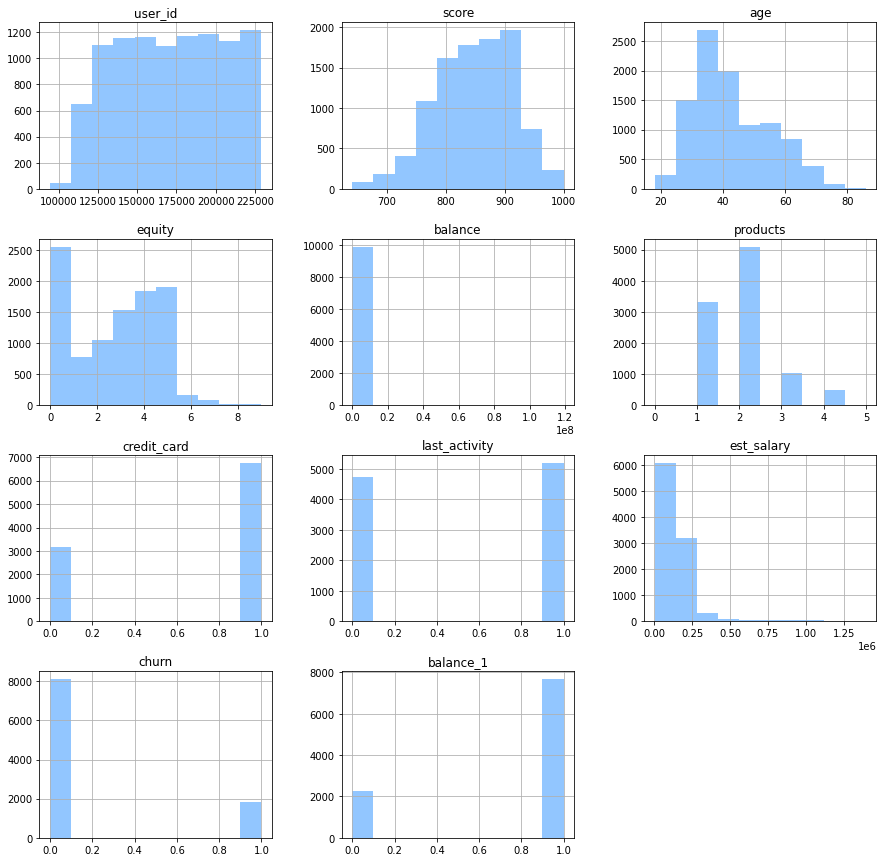

In [18]:
with plt.style.context('seaborn-pastel'):
    data.hist(figsize=(15,15))
    plt.show()

In [19]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_1
count,9924.000000,9924.000000,9924.000000,9924.000000,9.924000e+03,9924.000000,9924.000000,9924.000000,9.924000e+03,9924.000000,9924.000000
mean,171737.158706,848.731358,42.728839,2.634522,6.395982e+05,1.871624,0.679968,0.523378,1.478802e+05,0.183293,0.772269
std,33697.419981,65.396890,12.176452,1.979371,1.777858e+06,0.793151,0.466512,0.499478,1.393583e+05,0.386926,0.419389
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000
25%,142725.000000,802.000000,33.000000,0.000000,6.367806e+04,1.000000,0.000000,0.000000,7.525218e+04,0.000000,1.000000
50%,172643.000000,853.000000,40.000000,3.000000,3.767156e+05,2.000000,1.000000,1.000000,1.197154e+05,0.000000,1.000000
75%,201159.250000,900.000000,51.000000,4.000000,8.051574e+05,2.000000,1.000000,1.000000,1.746669e+05,0.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000


#### Рассмотрим поподробнее три переменные: возраст, предполагаемая зарплата, оценка

#### Создадим функцию по построению 'Ящика с усами'

In [20]:
def box_plot(data, title, label):
    plt.figure(figsize=(6,6))
    plt.boxplot(data, showmeans=True,
                     capprops=dict(linestyle='--', linewidth=3, color='darkgoldenrod', label='границы'),
                     boxprops=dict(linestyle='--', linewidth=4, color='black', label='квартили'),
                     flierprops = dict(marker='*', markersize=10, markerfacecolor='lightblue', markeredgecolor='lightblue', label='выбросы'),
                     meanprops = dict(linestyle='-.', linewidth=2.5, color='yellow', label='среднее'),
                     medianprops = dict(linestyle='-.', linewidth=3.5, color='firebrick', label='медиана'),
                     whiskerprops=dict(linestyle='-', linewidth=2, color='green', label='Усы')) 
    plt.xlabel('')
    plt.ylabel(label)
    plt.title(title)
    plt.legend()
    plt.show()

#### Переменная age

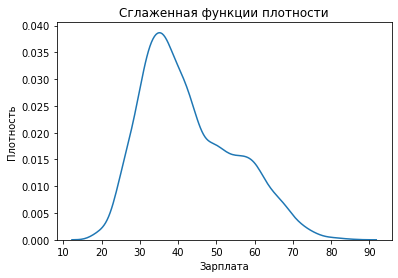

In [21]:
sns.kdeplot(x='age', data=data, common_norm=False);
plt.title("Сглаженная функции плотности")
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.show()

In [22]:
data.age.value_counts()

36.0    412
37.0    400
33.0    389
35.0    387
34.0    381
       ... 
83.0      3
82.0      2
84.0      2
86.0      2
79.0      2
Name: age, Length: 68, dtype: int64

#### Переменная est_salary

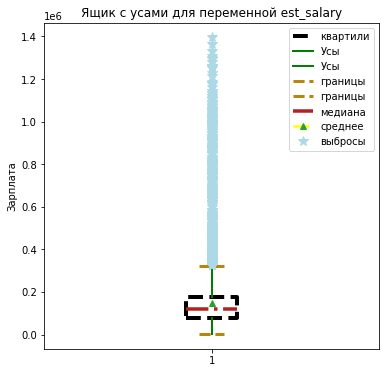

In [23]:
box_plot(data.est_salary, 'Ящик с усами для переменной est_salary', 'Зарплата')

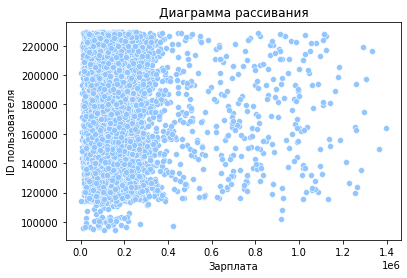

In [24]:
with plt.style.context('seaborn-pastel'):
    sns.scatterplot(x = data.est_salary, y = data.user_id)
    plt.xlabel('Зарплата')
    plt.ylabel('ID пользователя')
    plt.title('Диаграмма рассивания')
    plt.show()

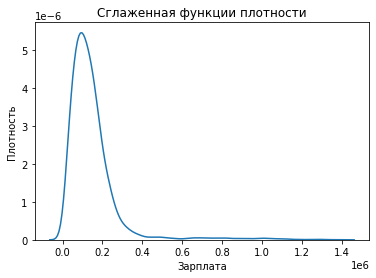

In [25]:
sns.kdeplot(x='est_salary', data=data, common_norm=False);
plt.title("Сглаженная функции плотности")
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.show()

#### Переменная score

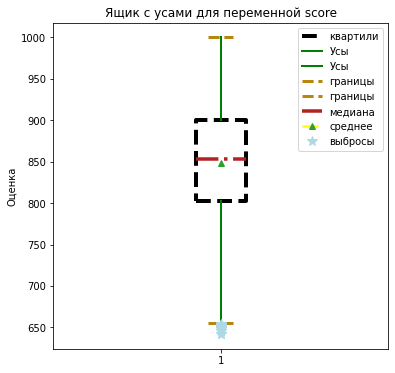

In [26]:
box_plot(data.score, 'Ящик с усами для переменной score', 'Оценка')

In [27]:
print("%s%% — процент выбросов в колонке score"%round((len(data[data['score'] < 650]) / len(data) * 100), 2))

0.13% — процент выбросов в колонке score


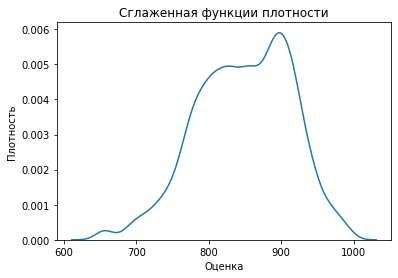

In [28]:
sns.kdeplot(x='score', data=data, common_norm=False);
plt.title("Сглаженная функции плотности")
plt.xlabel('Оценка')
plt.ylabel('Плотность')
plt.show()

### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

В ходе предобработки данных было выполнено следующее:

- Названия колонок были приведены к питоновскому стилю
- В переменной баланс было обноружено 22.95% пропусков от общего числа. Было сделано предположение о том, что данные пропуски появились в ходе некачественной выгрузки с сервера и была произведена их замена на заглушку и добавлен столбец с фиктивной переменной, поскольку пропуски имеют тип MAR
- В переменной age процент пустых значений незначителен, поэтому они были удалены
- В трех переменных присутствовали выбросы:
    * В переменной age наблюдается ассиметричность распределения, но она не мешает для последующего исследования
    * В переменной est_salary выбросы были оставлены, так как данные являются приблизительными
    * В переменной score выбросы составили меньше половины процента, поэтому они были оставлены
    
    
</div>

<p></p>

## Исследовательский анализ


### Распределения переменных

#### Анализ распределений 

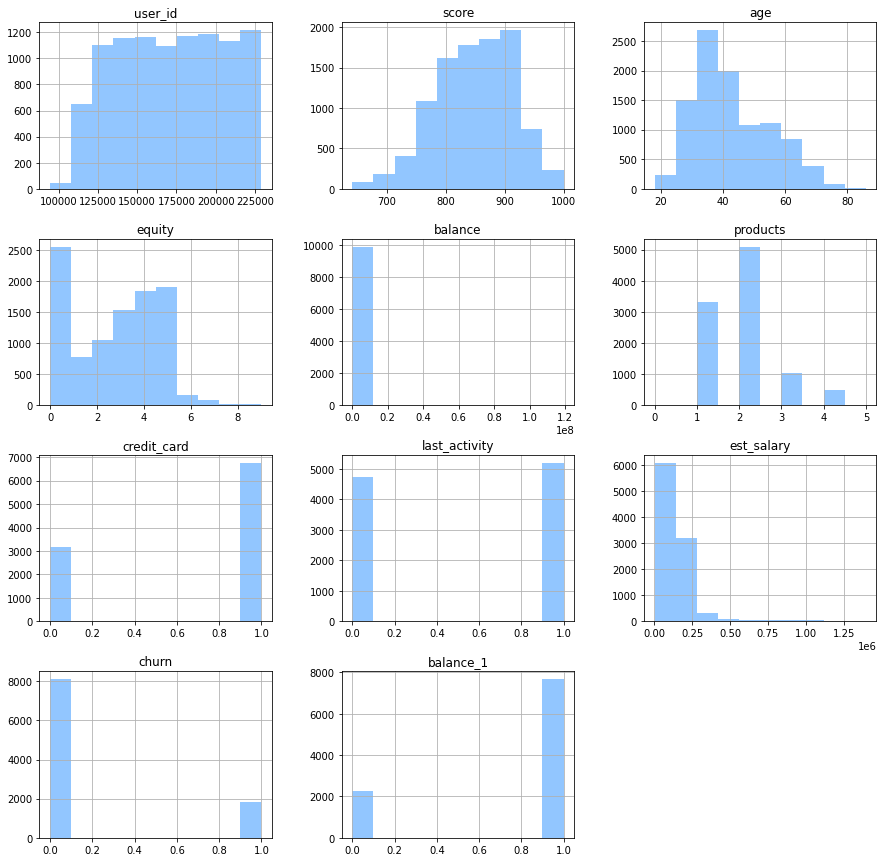

In [29]:
with plt.style.context('seaborn-pastel'):
    data.hist(figsize=(15,15))
    plt.show()

#### Анализ распределений  в разрезе оттока

##### Переменная age


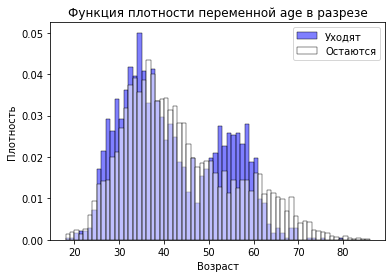

In [30]:
fig = sns.histplot(
    data=data,
    hue='churn',
    x='age',
    stat='density',
    common_norm=False,
    binwidth = 1,
    palette='flag')
fig.legend(labels=['Уходят', 'Остаются'])
plt.title("Функция плотности переменной age в разрезе")
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.show()

##### Переменная est_salary

In [31]:
np.percentile(data.est_salary, [90]) # ограничим гистограмму до 90 перцентиля

array([242286.407])

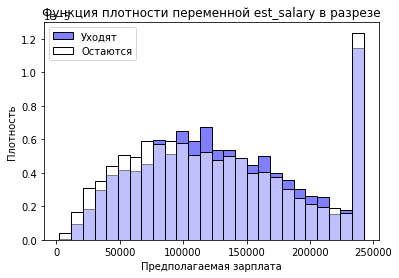

In [32]:
fig = sns.histplot(
    hue=data.churn,
    x=data.est_salary.clip(0, 242395.782),
    stat='density',
    common_norm=False,
    palette='flag')
fig.legend(labels=['Уходят', 'Остаются'])
plt.title("Функция плотности переменной est_salary в разрезе")
plt.xlabel('Предполагаемая зарплата')
plt.ylabel('Плотность')
plt.show()

##### Переменная score

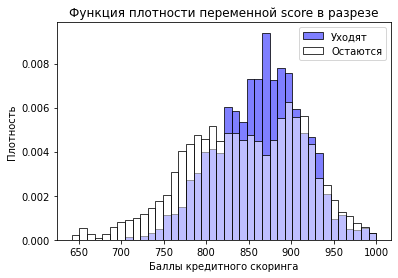

In [33]:
fig = sns.histplot(
    hue=data.churn,
    x=data.score,
    stat='density',
    common_norm=False,
    palette='flag')
fig.legend(labels=['Уходят', 'Остаются'])
plt.title("Функция плотности переменной score в разрезе")
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.show()

##### Переменная balance

In [34]:
np.percentile(data.balance, [75]) # ограничим гистограмму до 70 перцентиля

array([805157.3825])

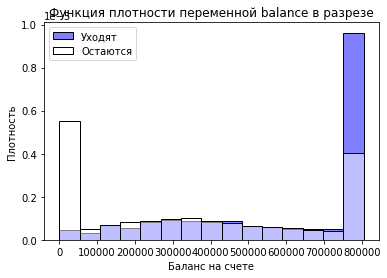

In [35]:
fig = sns.histplot(
    hue=data.churn,
    x=data.balance.clip(0, 805000),
    stat='density',
    common_norm=False,
    palette='flag')
fig.legend(labels=['Уходят', 'Остаются'])
plt.title("Функция плотности переменной balance в разрезе")
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.show()

In [36]:
np.percentile(data.balance, [95])

array([1847292.4525])

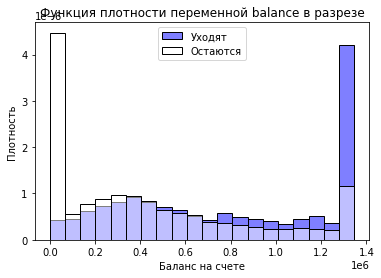

In [37]:
fig = sns.histplot(
    hue=data.churn,
    x=data.balance.clip(0, 1345852.876),
    stat='density',
    common_norm=False,
    palette='flag')
fig.legend(labels=['Уходят', 'Остаются'])
plt.title("Функция плотности переменной balance в разрезе")
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.show()

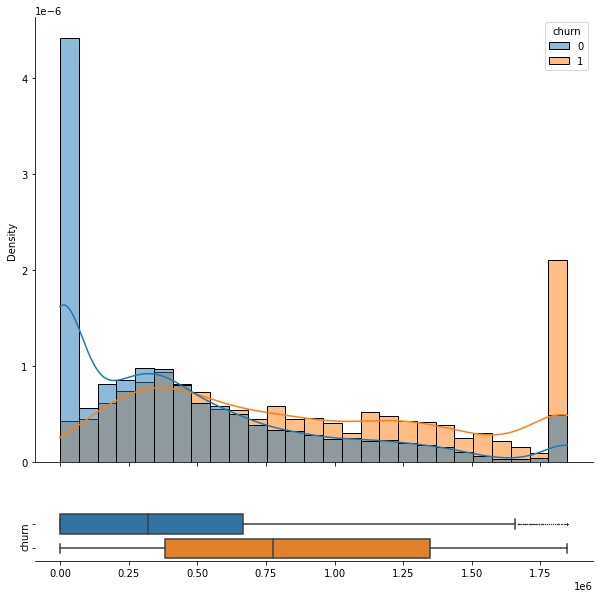

In [38]:

def histbox(df:pd.DataFrame, col:str='value') -> tuple:
    '''Функция для совместного отображения гистограмм и ящиков с усами'''
    hue = None
    df_hist = df
    if col not in df.columns:
        df_hist = df.melt()
        hue = 'variable'
        
    f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, figsize=(10,10),
                                        gridspec_kw={"height_ratios": (.9,.1)})
    sns.boxplot(data = df, orient="h", ax=ax_box, fliersize=.5)
    hist_params = {"data":df_hist, "x":col, "ax":ax_hist, "stat":"density", "common_norm":False, "kde":True}
    if len(df_hist.value.unique()) < 40:
        hist_params = {"binwidth":1, **hist_params}
    elif len(df_hist.value.unique()) < 80:
        hist_params = {"binwidth":2, **hist_params}
        
    try:
        sns.histplot(**hist_params, hue=hue)
    except ValueError:
        sns.histplot(**hist_params, hue="churn")

    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    ax_box.tick_params(axis="y",which="both",labelleft=False)
    return f, ax_hist, ax_box

histbox(data.assign(balance = data.balance.clip(0,data.balance.quantile(.95))).pivot(columns="churn",values="balance"));

### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

Исходя из гистограмм можно сделать следующие выводы:

- Переменная score распределена нормально
- Переменная age распределена нормально 
- Переменные credit_card, last_activity, churn распределены по Бернулли
- Переменная est_salary распределена Экспоненциально
    
Из гистограмм в разрезе видно:
    
- Клиенты возраста от 25 до 35 и от 50 до 60 более склонны к уходу из банка
- Клиенты с предполагаемой зарплатой от 100 до 200 тысяч рублей уходят чаще
- Клиенты с высоким кредитным рейтингом от 825 до 945 склонны к уходу из банка
- Клиенты с суммой на счете от 375000 до 1375000 чаще покидают банк, чем клиенты с более низким балансом    

### Исследование корреляций между переменными

#### Расчет корреляциионной матрицы

In [39]:
city = pd.get_dummies(data.city)
city['user_id'] = data.user_id

In [40]:
gender = pd.get_dummies(data.gender)
gender['user_id'] = data.user_id

In [41]:
corr = pd.merge(data, city)

In [42]:
corr = pd.merge(corr, gender)

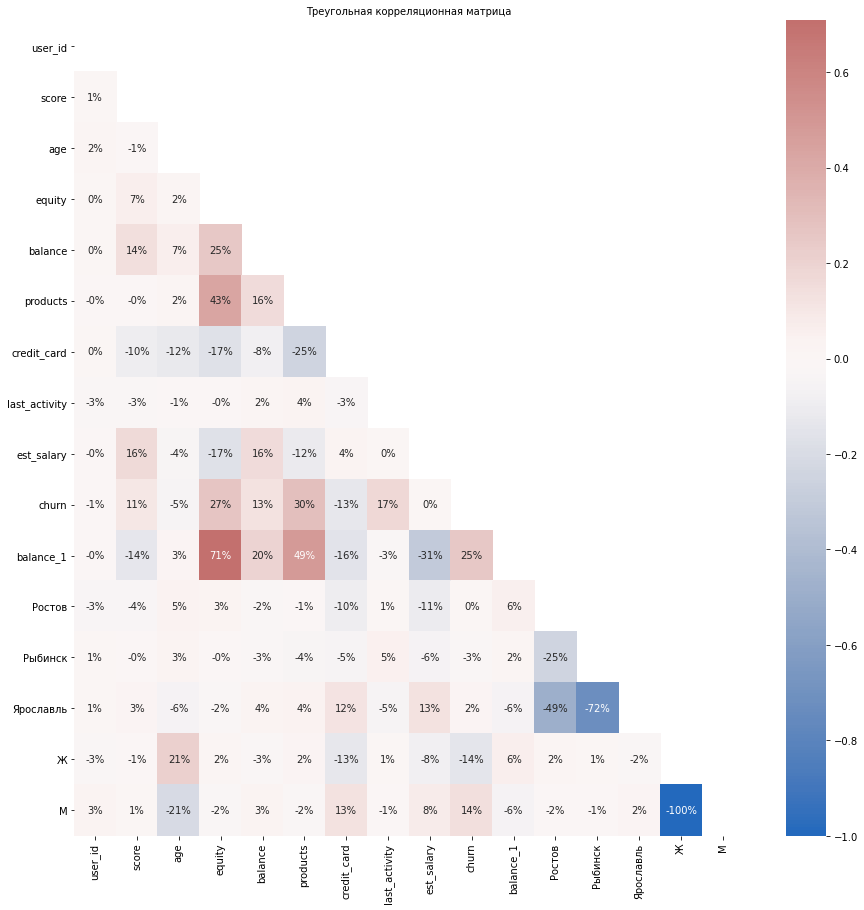

In [43]:
matrix = corr.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt=".0%", cmap='vlag')
plt.title('Треугольная корреляционная матрица', fontsize = 10)
plt.show()

### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">
 
На уход клиентов влияют следюущие показатели: 

- products с умеренной корреляцией 31%    
- equity с умеренной корреляцией 28%
- balance_1 с умеренной корреляцией 26%
- last_activity со слабой корреляцией 17%    
- balance со слабой корреляцией 14%  
- М со слабой корреляцией 13%
- score со слабой корреляцией 11% 

    
Рекоммендую в первую очередь обратить внимание на такие факторы:
- Количество продуктов, которыми пользуется клиент
- Приблизительную оценку собственности киента
- Баланс клиента
  

    
    
</div>

<p></p>

### Составление портрета срднестатистического клиента

#### Неотточные клиеты:


In [62]:
data[data['churn'] == 0].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_1
count,8105.000000,8105.000000,8105.000000,8105.000000,8.105000e+03,8105.000000,8105.000000,8105.000000,8.105000e+03,8105.0,8105.000000
mean,171907.064035,845.435657,43.015793,2.381246,5.303567e+05,1.758421,0.708822,0.483282,1.477883e+05,0.0,0.722764
std,33329.159923,68.007876,12.372299,1.970537,1.697410e+06,0.713447,0.454334,0.499751,1.427922e+05,0.0,0.447662
min,95384.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.0,0.000000
25%,142981.000000,796.000000,34.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,7.348966e+04,0.0,0.000000
50%,173142.000000,848.000000,40.000000,3.000000,3.217433e+05,2.000000,1.000000,0.000000,1.182472e+05,0.0,1.000000
75%,201157.000000,900.000000,51.000000,4.000000,6.656355e+05,2.000000,1.000000,1.000000,1.740878e+05,0.0,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,0.0,1.000000


In [63]:
data[data['churn'] == 0].city.value_counts()

Ярославль    4737
Рыбинск      2217
Ростов       1151
Name: city, dtype: int64

In [64]:
data[data['churn'] == 0].gender.value_counts()

Ж    4317
М    3788
Name: gender, dtype: int64

In [65]:
data[data['churn'] == 0].balance.median()

321743.27

In [66]:
data[data['churn'] == 0].est_salary.median()

118247.25

#### Отточные клиеты:

In [67]:
data[data['churn'] == 1].last_activity.mean()

0.7020340846619021

In [68]:
data[data['churn'] == 1].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_1
count,1819.000000,1819.000000,1819.000000,1819.000000,1.819000e+03,1819.000000,1819.000000,1819.000000,1.819000e+03,1819.0,1819.000000
mean,170980.103903,863.416163,41.450247,3.763057,1.126350e+06,2.376031,0.551402,0.702034,1.482897e+05,1.0,0.992853
std,35291.182757,49.620984,11.176459,1.585980,2.029411e+06,0.923592,0.497488,0.457490,1.229322e+05,0.0,0.084259
min,94561.000000,706.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.088027e+04,1.0,0.000000
25%,141304.000000,828.000000,32.000000,3.000000,3.815113e+05,2.000000,0.000000,0.000000,8.319661e+04,1.0,1.000000
50%,170532.000000,866.000000,39.000000,4.000000,7.753652e+05,2.000000,1.000000,1.000000,1.253952e+05,1.0,1.000000
75%,201399.500000,898.000000,52.000000,5.000000,1.347228e+06,3.000000,1.000000,1.000000,1.759854e+05,1.0,1.000000
max,229058.000000,1000.000000,79.000000,9.000000,6.486621e+07,5.000000,1.000000,1.000000,1.263028e+06,1.0,1.000000


In [69]:
data[data['churn'] == 1].city.value_counts()

Ярославль    1117
Рыбинск       437
Ростов        265
Name: city, dtype: int64

In [70]:
data[data['churn'] == 1].gender.value_counts()

М    1183
Ж     636
Name: gender, dtype: int64

In [71]:
data[data['churn'] == 1].balance.median()

775365.19

In [72]:
data[data['churn'] == 1].est_salary.median()

125395.22

### Вывод

Среднестатичстический клиент:

|Переменная|Неотточный клиент|Отточный клиент|
|---|---|---|
| Средняя оценка кредитного рейтинга:  | 845  |  863 |
| Город:   | Ярославль  | Ярославль  |
| Пол:  | Ж  | М  |
| Средний возраст:  | 43  | 41  |
| Средняя оценка собственности клиента:  | 2.4  | 3.8  |
| Медаинный баланс на счете:  | 321643  | 775365 |
| Среднее количество продутков:  | 1.8  | 2.4  |
| Наличие кредитной карты в процентах:  | 71%  | 55%  |
| Последняя активность в процентах:  | 48%  | 70%  |
| Медианная приблизительная зарплата:  | 118229  | 125395  |


Рекоммендую обратить внимание на такие факторы оттока:

- Высокую среднюю оценку кредитного рейтинга 863
- Мужской пол
- Высокую среднюю собственности клиента 3.8
- Высокий медианный баланс на счете 775365
- Среднее количество продутков 2.4
- Низкий уровень наличие кредитной карты в процентах 55%
- Медианная приблизительная зарплата 125395


## Проверка гипотез

### Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались

In [73]:
data.groupby('churn')['est_salary'].mean()

churn
0    147788.268353
1    148289.702221
Name: est_salary, dtype: float64

In [74]:
np.percentile(data.query('churn == 1')['est_salary'], 95)

304044.812

In [75]:
np.percentile(data.query('churn == 0')['est_salary'], 95)

320940.18599999987

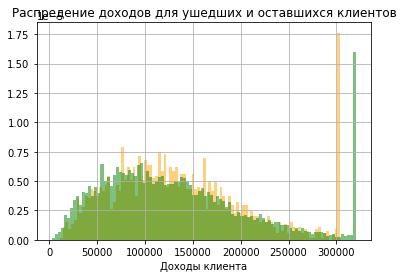

In [76]:
data.query('churn == 1')['est_salary'].clip(0, 304044.812).hist(bins=100, alpha=0.5, color='orange', density = True)
data.query('churn== 0')['est_salary'].clip(0, 320670.0019999999).hist(bins=100, alpha=0.5, color='green', density = True)
plt.title('Распредение доходов для ушедших и оставшихся клиентов') # название графика
plt.xlabel('Доходы клиента') # подпись оси x
plt.show()

#### Воспользуемся тестом Манна-Уитни

Поскольку две выборки имеют не нормальное распределение, то воспользуемся тестом Манна-Уитни

${H}_{0}$: Средние доходы ушедших клиентов равны средним доходам оставшихся клиентам

${H}_{1}$: Средние доходы ушедших клиентов неравны средним доходам оставшихся клиентам

$\alpha = 0.05$

In [77]:
results = mannwhitneyu(data.query('churn == 1')['est_salary'], 
                             data.query('churn== 0')['est_salary'], 
                             alternative='two-sided')

alpha = 0.05 #задаем значение уровня значимости

# вывод значения p-value на экран 
print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.00023403935398296229
Отвергаем нулевую гипотезу


### Сформулируем и проверим статистическую гипотезу относительно представленных данных

${H}_{0}$: Средний рейтинг ушедших клиентов равен среднему рейтингу оставшихся клиентов

${H}_{1}$: Средий рейтинг клиентов неравен среднему рейтингу оставшихся клиентов

$\alpha = 0.05$

In [78]:
data.groupby('churn')['score'].mean()

churn
0    845.435657
1    863.416163
Name: score, dtype: float64

In [79]:
np.percentile(data.query('churn == 1')['score'], 5)

779.9

In [80]:
np.percentile(data.query('churn == 0')['score'], 5)

729.0

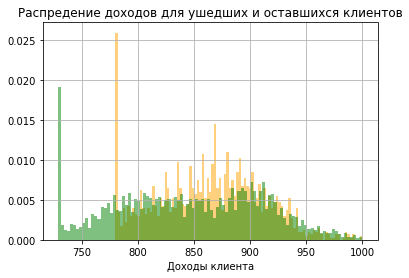

In [81]:
data.query('churn == 1')['score'].clip(779.9, 1000).hist(bins=100, alpha=0.5, color='orange', density=True)
data.query('churn== 0')['score'].clip(729.0, 1000).hist(bins=100, alpha=0.5, color='green', density=True)
plt.title('Распредение доходов для ушедших и оставшихся клиентов') # название графика
plt.xlabel('Доходы клиента') # подпись оси x
plt.show()

In [82]:
results = st.ttest_ind(
    data.query('churn == 1')['score'],
    data.query('churn== 0')['score'],
    equal_var = False,
    nan_policy='omit'
)    

alpha = 0.05 #задаем значение уровня значимости

# вывод значения p-value на экран 
print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.4273192549892334e-37
Отвергаем нулевую гипотезу


### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

- При проверки гипотезы о раличии дохода между теми клиентами, которые ушли и теми, которые остались было выяснено:
При 5% уровне значимости можно сказать, что средние доходы между теми клиентами, которые ушли и которые остались неравны. Для проверки гипотезы был использован тест Манна-Уитней, так как данные не являются нормальными
    
- При проверке гипотезы о различии среднего рейтинга между теми клиентами, которые ушли и теми, которые остались было выяснено:
При 5% уровне значимости можно сказать, что средний рейтинг ушедших клиентов неравен среднему рейтингу оставшихся клиентов
    
    

</div>

<p></p>

## Влияние признаков на отток

In [83]:
data_new.isna().sum()

user_id           0
score             0
age               0
equity            0
balance           0
products          0
credit_card       0
last_activity     0
est_salary        0
churn             0
balance_1         0
city_Ростов       0
city_Рыбинск      0
city_Ярославль    0
gender_Ж          0
gender_М          0
dtype: int64

In [84]:
data_new = data.copy()
# Произведем One-Hot encoding 
data_new = pd.get_dummies(data_new)

y = np.array(data_new['churn'])
X = data_new.drop('churn', axis = 1)

X_name = list(X.columns)
y_name = list(['churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

clf = DecisionTreeClassifier(random_state=42)

In [85]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

Точность модели: 0.8216624685138539


In [86]:
# Настроим модель
param_dist = {"max_depth": randint(1,10),
              "max_features": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"]}

tree_cv = RandomizedSearchCV(clf, param_dist, cv=5, random_state=42)

tree_cv.fit(X,y)

print("Параметры настроенной модели: {}".format(tree_cv.best_params_))
print("Лучшая оценка {}".format(tree_cv.best_score_))

Параметры настроенной модели: {'criterion': 'gini', 'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 1}
Лучшая оценка 0.8566091959860243


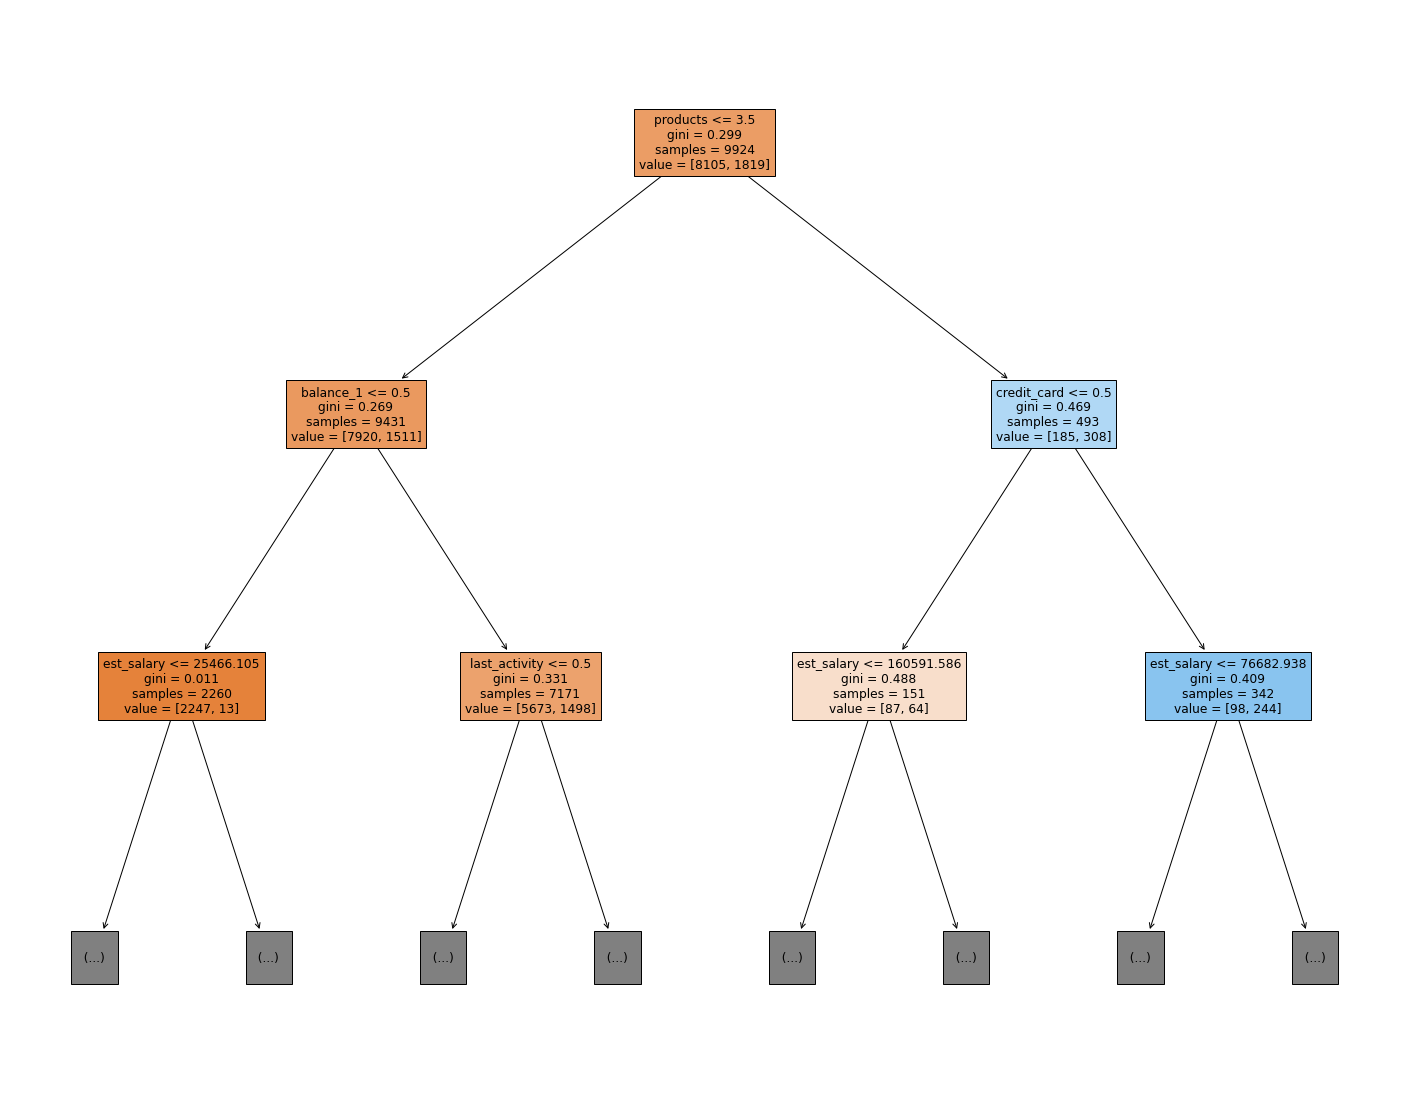

In [87]:
# Изобразим модель
clf = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth=6, max_features= 9, min_samples_leaf= 1)
clf.fit(X,y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=X_name, filled=True, max_depth = 2)

### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

В ходе выяснения влияния признаков на отток была использована и настроена модель DecisionTreeClassifier, с помощью которой можно сделать следующие выводы о признаках влияющих на отток клиентов:
   
- Клиенты, у которых количество продуктов банка меньше 3,5 и нет кредитной карты и предполагаемая запрлата ниже 76683 с большей вероятностью уходят из банка
- Клиенты, у которых количество продуктов банка меньше 3,5 и нет кредитной карты и баланс на карте меньше 1222946 с большей вероятностью уходят из банка  
- Клиенты, у которых количество продуктов банка меньше 3,5 и оценка собственности меньше 1,5 и баланс меньше 483915 с большей вероятностью уходят из банка      
- Клиенты, у которых количество продуктов банка меньше 3,5 и оценка собственности меньше 1,5 и баллов кредитного скоринга меньше 834,5 с большей вероятностью уходят из банка         
</div>

<p></p>

## Сегментация на основе стратегических показателей

In [88]:
df = data.copy()
df = df.drop(['user_id', 'churn', 'city', 'gender','equity', 'last_activity', 'products',"age"], axis = 1)

In [89]:
df = pd.get_dummies(df)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df)

In [90]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)


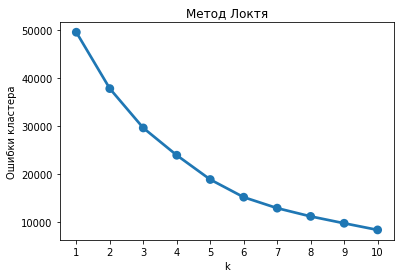

In [91]:
plt.title('Метод Локтя')
plt.xlabel('k') 
plt.ylabel('Ошибки кластера')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()

In [92]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [93]:
data = data.assign(clusterlabel = model.labels_)

In [94]:
data.groupby("clusterlabel")[["balance", "est_salary", 'credit_card', 'score']].median()

,balance,est_salary,credit_card,score
clusterlabel,,,,
0,640563.525,110900.10,0,851.0
1,465931.550,103964.82,1,834.0
2,0.000,175959.83,1,903.0


In [95]:
data.groupby("clusterlabel")[["balance", "est_salary", 'credit_card', 'score']].mean()

,balance,est_salary,credit_card,score
clusterlabel,,,,
0,1.091719e+06,130847.726190,0.003256,851.229016
1,6.507261e+05,114727.064542,1.000000,838.955583
2,7.199839e+04,238564.237388,0.816717,866.422290


In [96]:
data.groupby('clusterlabel')[['churn']].mean()

,churn
clusterlabel,
0,0.295586
1,0.201110
2,0.010448


In [98]:
df_copy = data.copy()
examples = [
    ("Мужчины старше 50", 'gender == "М" and 50 < age'),
    ("Клиенты с предполагаемой зарплатой от 100000 до 200000",'100000 < est_salary < 200000'),
    ("Клиенты с высоким кредитным рейтингом ", ' 825 < score < 925 '),
    ("Клиенты c оценкой собственности больше 3", 'equity > 3'),
    ("Жители Ярославля без кредитной карты", 'city == "Ярославль" and credit_card == 0'),
    ("Клиенты c оценкой собственности больше 3 и количеством продуктов больше 2", 'equity > 3 and products > 2'),
    ("Клиенты, использующие больше двух продуктов",'products > 2'),
    ("Клиенты без кредитной карты и использующие больше двух продуктов",'credit_card == 0 and products > 2'),
    ("Клиенты старше 50 с количеством продуктов больше 2",' 50 < age and products > 2'),
    ("Клиенты активные старше 50 без кредитки", '50 < age and credit_card == 0 and last_activity == 1'),
]

churn_mean = data.churn.mean()

# по заданным запросам делаем табличку с размерами разных групп и уровнем оттока
dfs_temp = []
for text, query in examples:
    result = df_copy.query(query)\
              .agg({"churn":["mean","count"]}).T
    result.index = [text]
    dfs_temp.append(result)
df_copy = pd.concat(dfs_temp)

# считаем превышение оттока над средним
df_copy['churn_suplus'] = df_copy['mean'] - churn_mean

# считаем комбинированный коэффициент для сортировки
# с поправкой на то, что крупные сегменты сложнее обрабатывать
df_copy['idx'] = np.sqrt(df_copy['count']) * df_copy['churn_suplus']

# ранжируем по ним и оформляем вывод
df_copy.sort_values("idx", ascending=False)\
       .drop(["idx","mean"],axis=1)\
       .style.format("{:.1%}",subset=["churn_suplus"])\
       .format("{:_.0f}",subset=["count"])

,count,churn_suplus
"Клиенты, использующие больше двух продуктов",1_522,21.4%
Клиенты c оценкой собственности больше 3 и количеством продуктов больше 2,949,26.6%
Клиенты c оценкой собственности больше 3,4_021,10.2%
Жители Ярославля без кредитной карты,1_610,10.8%
Клиенты старше 50 с количеством продуктов больше 2,452,19.7%
Клиенты без кредитной карты и использующие больше двух продуктов,818,14.1%
Клиенты с высоким кредитным рейтингом,5_180,5.1%
Мужчины старше 50,902,12.0%
Клиенты активные старше 50 без кредитки,606,12.2%
Клиенты с предполагаемой зарплатой от 100000 до 200000,4_280,2.1%


### Вывод

<p></p>

<div style="border:solid black 1px; padding: 20px">

В ходе исследования при помощи метода KMeans клиенты были сегментированы в три категории:
 
- '0' - C самым низким средним кредитным рейтингом 843,5, с кредитной картой, с медианной зарплатой 120889 и медианным балансом 524272. В среднем 15% от всех клиентов этой категории уходят из банка
- '1' - Со средним кредитным рейтингом 856, без кредитной карты, с медианной зарплатой 119282 и медианным балансом 535230. В среднем 27% от всех клиентов этой категории уходят из банка
- '2' - С самым высоким средним кредитным рейтингом 884, c кредитной картой, c медианной зарплатой 803358 и медианным балансом 524272. В среднем 16% от всех клиентов этой категории уходят из банка
    
Рекоммендую сконцентрировать внимание на категории '1' и убедить клиентов взять кредитную карту, что сможет остановить их отток, а также обратить внимание на такие категории клиентов:
    
- Клиенты, использующие больше двух продуктов:	1522 человек	21.4% превышение оттока над средним
- Клиенты c оценкой собственности больше 3 и количеством продуктов больше 2: 949 человек	26.6% превышение оттока над средним
- Клиенты c оценкой собственности больше 3:	4021 человек	10.2% превышение оттока над средним
- Жители Ярославля без кредитной карты:	1610 человек	10.8% превышение оттока над средним
- Клиенты старше 50 с количеством продуктов больше 2:	452 человек	19.7% превышение оттока над средним
- Клиенты без кредитной карты и использующие больше двух продуктов:	818	человек 14.1% превышение оттока над средним
- Клиенты с высоким кредитным рейтингом:	5180 человек	5.1% превышение оттока над средним
- Мужчины старше 50:	902 человек	12.0% превышение оттока над средним
- Клиенты активные старше 50 без кредитки:	606 человек	12.2% превышение оттока над средним
- Клиенты с предполагаемой зарплатой от 100000 до 200000:	4280 человек	2.1% превышение оттока над средним
    
    
</div>

<p></p>

## Общий вывод и рекоммендации по приоритетным сегментам

<p></p>

<div style="border:solid black 1px; padding: 20px">
    
В итоге хочется отметить:
    
- Средние доходы у тех клиентов кто остался выше чем у тех кто ушел при 5% уровне значимости
- Между количеством продуктов, которыми пользуется клиент и уходом клиентов есть умеренная корреляция   
- Клиенты без кредитной карты более склонны к уходу

Рекоммендации: 

- Чтобы оставить клиентов с более высоким количеством денег на балансе свышк 775365, предлагать привелегии
- Наибольший отток замечен у пользователей без кредитной карты, следовательно необходимо предлагать этим клиентам более выгодные условия для ее оформления
    
Обратить особое внимание на такие факторы ухода:
    
- Высокую среднюю оценку кредитного рейтинга 825 до 945
- Мужской пол
- Высокую среднюю собственности клиента 3.8
- Высокий баланс от 375000 до 1375000
- Низкий уровень наличие кредитной карты в процентах 55%
- Клиенты, использующие больше двух продуктов
- Со средним возрастом от 25 до 35 и от 50 до 60

А также обратить внимание на такие категории клиентов:
    
- Клиенты, использующие больше двух продуктов:	1522 человек	21.4% превышение оттока над средним
- Клиенты c оценкой собственности больше 3 и количеством продуктов больше 2: 949 человек	26.6% превышение оттока над средним
- Клиенты c оценкой собственности больше 3:	4021 человек	10.2% превышение оттока над средним
- Жители Ярославля без кредитной карты:	1610 человек	10.8% превышение оттока над средним
- Клиенты старше 50 с количеством продуктов больше 2:	452 человек	19.7% превышение оттока над средним
- Клиенты без кредитной карты и использующие больше двух продуктов:	818	человек 14.1% превышение оттока над средним
- Клиенты с высоким кредитным рейтингом:	5180 человек	5.1% превышение оттока над средним
- Мужчины старше 50:	902 человек	12.0% превышение оттока над средним
- Клиенты активные старше 50 без кредитки:	606 человек	12.2% превышение оттока над средним
- Клиенты с предполагаемой зарплатой от 100000 до 200000:	4280 человек	2.1% превышение оттока над средним
     
    
</div>

<p></p>

## Презентация

https://drive.google.com/file/d/1oWwal90PVQaNN9zipk-TRzXZ3chaKr9U/view?usp=sharing